# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [36]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0]=0
        for i in range(1,n+1):
            positions[i]=positions[i-1]+walker.pickStep(self)
            x0=positions[i]
        return positions

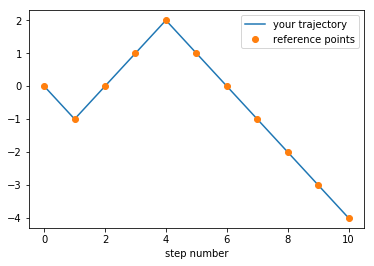

In [37]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

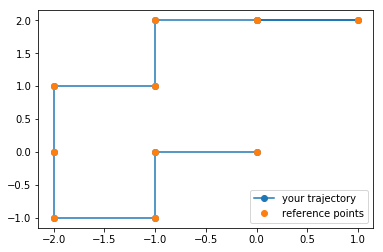

In [38]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

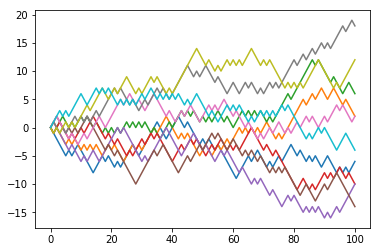

In [39]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
-1.9378199999999994


Text(0.5,1,'A graph to show the Average position and Average squared positions of 100 Random Walkers')

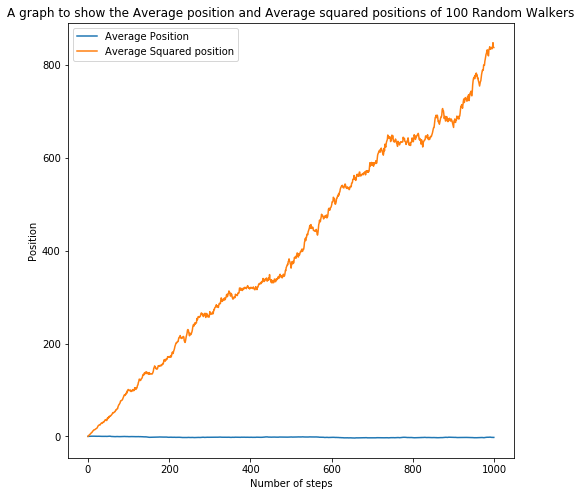

In [67]:
nsteps = 1000
ndim = 1
nwalkers = 100
v=walker(ndim)
average=[]
average2=[]
history=numpy.zeros((nsteps,nwalkers))
history2=numpy.zeros((nsteps,nwalkers))

c=numpy.zeros(nwalkers)
for j in range(0,nwalkers):
    d=v.doSteps(nsteps)
    for i in range(0,nsteps):   
        history[i][j]=d[i]
        history2[i][j]=d[i]**2
        #print(history2.shape)
print(history[0])
for g in range(0,nsteps):
    average.append(sum(history[g]/nwalkers))
    average2.append(sum(history2[g]/nwalkers))

plt.figure(figsize=(8,8))
print(sum(average)/nsteps)
plt.plot(numpy.arange(0,nsteps,1),average, label='Average Position')
plt.plot(numpy.arange(0,nsteps,1),average2, label='Average Squared position')
plt.xlabel('Number of steps')
plt.ylabel('Position')
plt.legend()
plt.title('A graph to show the Average position and Average squared positions of 100 Random Walkers')

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'A graph to show how the Average squared distance for random walker varies with\nthe number of steps in different Dimensions')

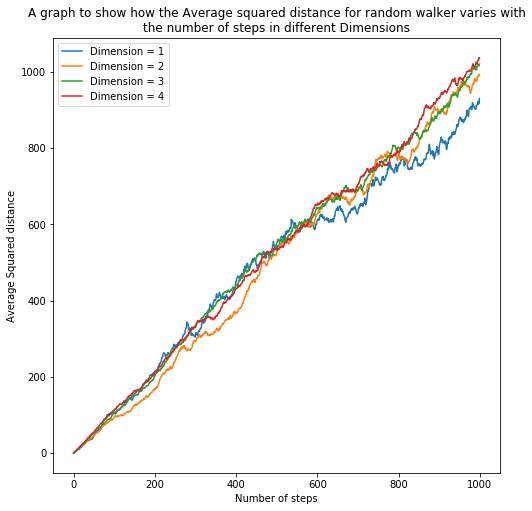

In [75]:
nsteps = 1000
nwalkers = 100
dimensions = range(1,5)
plt.figure(figsize=(8,8))
for o in dimensions:
    v=walker(0,ndim=dimensions[o-1],)
    average2=numpy.zeros(nsteps)
    q=numpy.zeros(o)
    history2=numpy.zeros((nsteps,nwalkers))
    for j in range(0,nwalkers):
        d=v.doSteps(nsteps)
        for i in range(0,nsteps): 
            for r in range(0,o):
                q[r]=d[i][r]**2
            history2[i][j]=sum(q)
        #print(history2.shape)
    for g in range(0,nsteps):
        average2[g]=(sum(history2[g]/nwalkers))
    plt.plot(numpy.arange(0,nsteps,1),average2, label='Dimension = {}'.format(dimensions[o-1]))
plt.legend()
plt.xlabel('Number of steps')
plt.ylabel('Average Squared distance')
plt.title('A graph to show how the Average squared distance for random walker varies with' '\n' 'the number of steps in different Dimensions')

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


[[ 0.0000000e+00  0.0000000e+00]
 [ 5.0000001e-02  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -5.0000001e-02]
 [ 5.0000001e-02 -5.0000001e-02]
 [ 0.0000000e+00 -5.0000001e-02]
 [ 5.0000001e-02 -5.0000001e-02]
 [ 5.0000001e-02 -7.4505807e-10]
 [ 5.0000001e-02 -5.0000001e-02]
 [ 5.0000001e-02 -7.4505807e-10]
 [ 0.0000000e+00 -7.4505807e-10]]
[[ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  5.0000001e-02]
 [ 5.0000001e-02  5.0000001e-02]
 [ 5.0000001e-02  1.0000000e-01]
 [ 5.0000001e-02  5.0000001e-02]
 [ 5.0000001e-02  1.0000000e-01]
 [ 1.0000000e-01  1.0000000e-01]
 [ 1.0000000e-01  5.0000001e-02]
 [ 5.0000001e-02  5.0000001e-02]
 [ 5.0000001e-02  1.0000000e-01]
 [ 5.0000001e-02  1.5000001e-01]
 [ 0.0000000e+00  1.5000001e-01]
 [ 0.0000000e+00  2.0000000e-01]
 [-5.0000001e-02  2.0000000e-01]
 [-5.0000001e-02  2.5000000e-01]
 [-7.4505807e-10  2.5000000e-01]
 [-7.4505807e-10  3.0000001e-01]
 [-7.4505807e-10  3.5000002e-01]
 [-7.4505807e-10  3.0000001e-01]
 [-5.0000

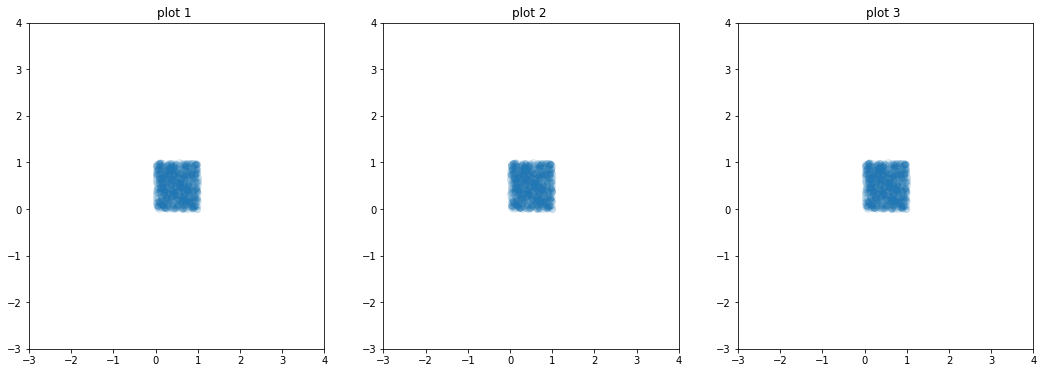

In [87]:
ndim=2
nwalkers=1000
v=walker(0,ndim)
rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
v=walker(rand_pos,ndim,step_size=0.05)

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    r=v.doSteps(nsteps)
    print(r)
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)